# Final Project Submission

Please fill out:
* Student name: Hogan Byun
* Student pace: full time
* Scheduled project review date/time: 1/25/2021 3:15 PM EST
* Instructor name: Abhineet Kulkarni
* Blog post URL: https://dev.to/hoganbyun/continuous-vs-categorical-how-to-treat-these-variables-in-multiple-linear-regression-16e2


**This project will follow the OSEMN process:**
- Obtain
- Scrub
- Explore
- Model
- Interpret

# Obtain

In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
ls

README.md                             house_code.ipynb
Understanding_The_Housing_Market.pdf  plots/
data/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [4]:
pd.set_option('display.max_columns', 100)

In [5]:
df = pd.read_csv('data/kc_house_data.csv')

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Scrub

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [8]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see that waterfront, view, and yr_renovated all contain NaN values that must be cleaned.

## Data Cleaning

### sqft_basement

sqft_basement is type object - convert to type int

In [9]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
295.0         1
516.0         1
2250.0        1
792.0         1
2730.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
295.0     0.000046
516.0     0.000046
2250.0    0.000046
792.0     0.000046
2730.0    0.000046
Name: sqft_basement, Length: 304, dtype: float64

There seems to be some '?' as a value for sqft_basement (around 2% of values) and we know that sqft_living and sqft_above don't have '?' values because the data-type for these are int64

Instead of dropping these, remember that the sqft_basement and sqft_above variables should add up to sqft_living.
So, make sqft_basement for these '?' values to be (sqft_living - sqft_above)

In [11]:
# Test run
df_basement_test = df

In [12]:
df_basement_test['sqft_basement_test'] = df_basement_test['sqft_living'] - df_basement_test['sqft_above']

In [13]:
df_basement_test['sqft_basement_test']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement_test, Length: 21597, dtype: int64

In [14]:
df_basement_test['sqft_basement_test'].value_counts() / len(df_basement_test['sqft_basement_test'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement_test, Length: 306, dtype: float64

No more '?' values, we can now replace sqft_basement with new values

In [15]:
df = df.assign(sqft_basement=df_basement_test['sqft_basement_test'])

In [16]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_test'],
      dtype='object')

In [18]:
df.drop('sqft_basement_test', axis=1, inplace=True)

### Waterfront and yr_renovated

There seem to be missing values in waterfront and yr_renovated - makes sense because not all houses will have waterfronts or be renovated

Investigate waterfront further:

In [19]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [20]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.11001527989998611

Waterfront seems to be described as 1 or 0, indicating whether the house has a waterfront (1) or does not have one (0). If not specifically mentioned (NaN), assume there is no waterfront.

In [21]:
df['waterfront'] = df['waterfront'].fillna(0)

In [22]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.0

In [23]:
# waterfront seems to be 0 or 1, so change data type to int
df['waterfront'] = df['waterfront'].astype(int)

0 seems to be used in a similar way to yr_renovated, so repeat the process with yr_renovated

In [24]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [25]:
df['yr_renovated'].isna().sum()

3842

In [26]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [27]:
df['yr_renovated'].isna().sum() / len(df['yr_renovated'])

0.0

In [28]:
# change data type to int
df['yr_renovated'] = df['yr_renovated'].astype(int)

### date

Replace 'date' column with month only -> makes it easier to view as a categorical variable

In [29]:
df['date_dateformat'] = pd.to_datetime(df['date'])

In [30]:
df['month'] = df.date_dateformat.dt.month

In [31]:
df['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [32]:
df.drop('date_dateformat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

### id

No need for id for this particular project

In [33]:
df.drop('id', axis=1, inplace=True)

### view

There are also NaN values within view. In this case, it was suitable to just drop these rows.

In [34]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [35]:
df['view'].isna().sum() / len(df['view'])

0.0029170718155299346

'view' column has 0.3% of its values as NaN - just drop these

In [36]:
len(df)

21597

In [37]:
df.dropna(subset=['view'], inplace=True)

In [38]:
len(df)

21534

Lost 63 rows

In [39]:
# view seems to be integers, so change data type to int
df['view'] = df['view'].astype(int)

In [40]:
df['view'].value_counts()

0    19422
2      957
3      508
1      330
4      317
Name: view, dtype: int64

# Explore

## Collinearity Checks

For this analysis, I am using a threshold of r = 0.8

In [41]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.321816,0.054273,0.117982,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.009691
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.302149,0.155462,0.017797,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.000876
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.282563,0.507565,0.046955,-0.204435,0.024487,0.225025,0.569139,0.088854,0.007133
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.433930,0.318217,0.050871,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011968
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015487,0.052646,0.005091,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003504
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.246203,0.489410,0.003317,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013782
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.080684,-0.025000,0.074327,0.029490,-0.012282,-0.037845,0.082352,0.030605,0.008671
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.005327
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.173279,-0.361398,-0.055730,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.022347
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.166673,0.448255,0.015235,-0.185710,0.113787,0.200821,0.713462,0.121435,0.008787


<AxesSubplot:>

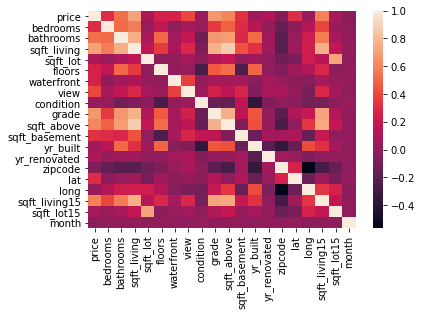

In [42]:
sns.heatmap(df.corr())

In [43]:
df.corr() > .8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Look at the correlations below and you can notice that sqft_living and sqft_above have an extremely high correlation of .876, which is above my .8 threshold. Thus, one of the two must be removed due to collinearity. Sqft_above was chosen as that column.

sqft_living and sqft_above have a high collinearity of .876 -> drop sqft_above

In [44]:
df.drop('sqft_above', axis=1, inplace=True)

## Outliers

In [45]:
# Filter through each column and drop any outliers
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_basement', 'sqft_living15',
           'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col])) > 3].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19836 non-null  float64
 1   bedrooms       19836 non-null  int64  
 2   bathrooms      19836 non-null  float64
 3   sqft_living    19836 non-null  int64  
 4   sqft_lot       19836 non-null  int64  
 5   floors         19836 non-null  float64
 6   waterfront     19836 non-null  int64  
 7   view           19836 non-null  int64  
 8   condition      19836 non-null  int64  
 9   grade          19836 non-null  int64  
 10  sqft_basement  19836 non-null  int64  
 11  yr_built       19836 non-null  int64  
 12  yr_renovated   19836 non-null  int64  
 13  zipcode        19836 non-null  int64  
 14  lat            19836 non-null  float64
 15  long           19836 non-null  float64
 16  sqft_living15  19836 non-null  int64  
 17  sqft_lot15     19836 non-null  int64  
 18  month 

Lost around 1-2 thousand data points from removing outliers.

## Categorical Variables

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype

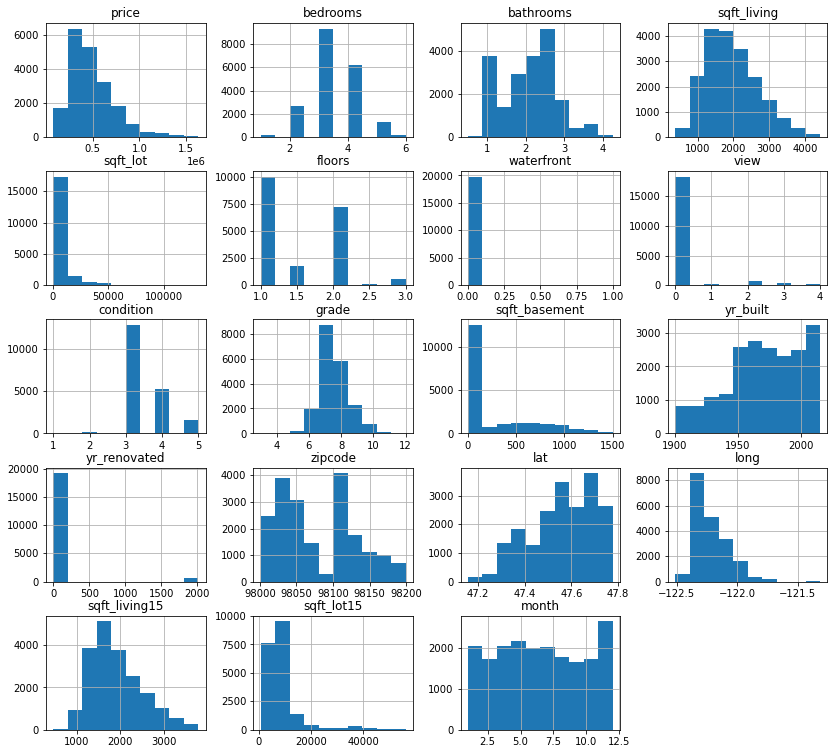

In [46]:
df.hist(figsize=(14,13))

Now, decide which variables are categorical and thus need dummy columns

**Categorical Variables** 
- id: identifyer
- waterfront: indicates whether a house has a waterfront or not
- condition: finite grading scale
- grade: finite grading scale -bin 
- zipcode: zipcodes are finite categories - bin
- month: finite 1-12 month - bin into seasons

In [47]:
# before create dummies, set aside a copy to use for binning later.

bin_df = df

In [48]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(df['waterfront'], prefix = 'waterfront', drop_first=True)
condition_dummy = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(df['grade'], prefix = 'grade', drop_first=True)
zipcode_dummy = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first=True)
month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first=True)

In [49]:
df = df.drop(['waterfront', 'condition', 'grade', 'zipcode', 'month'], axis=1)
cat_df = pd.concat([waterfront_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)
df = pd.concat([df, waterfront_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)

In [50]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1.00,1180,5650,1.0,0,0,1955,0,47.5112,-122.257,1340,5650,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,400,1951,1991,47.7210,-122.319,1690,7639,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,47.7379,-122.233,2720,8062,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now that categorical variables are decided, it's time to remove outliers from continuous variables. Here, an outlier will be treated as a data point that is over 3 standard deviations away from the mean. Also, I am not finding outliers for any data referring to date or location.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Columns: 108 entries, price to month_12
dtypes: float64(5), int64(9), uint8(94)
memory usage: 4.0 MB


In [52]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'view', 'sqft_basement', 'yr_built', 'yr_renovated',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=108)

### Binning Categorical Variables

Separate categorical variables into groups. This will be used later in its separate model.

Our categorical variables are waterfront, view, condition, grade, zipcode, and month.

**Waterfront**

Does not need binning as there is only 1 or 0 indicating whether a waterfront exists.

**Condition**

Condition is graded on a 1-5 scale. This one is hard to bin by criteria as there is none given for a respective grade. Based on the value counts, 3 seems to be the most prevalent. In this case, use the following,

- 1-2 Bad
- 3 Average
- 4 Good
- 5 Excellent

In [53]:
bin_df['condition'].value_counts()

3    12849
4     5250
5     1556
2      153
1       28
Name: condition, dtype: int64

In [54]:
condition_bins = [0, 2, 3, 4, 5]
pd.cut(bin_df['condition'], condition_bins, labels=['Bad', 'Average', 'Good', 'Excellent'])

0          Average
1          Average
2          Average
3        Excellent
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 19836, dtype: category
Categories (4, object): ['Bad' < 'Average' < 'Good' < 'Excellent']

<AxesSubplot:>

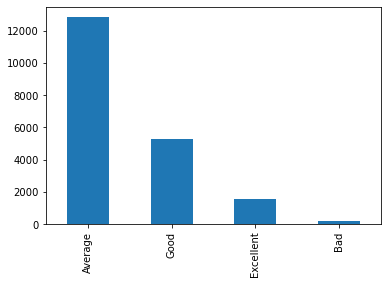

In [55]:
conditions_bins = pd.cut(bin_df['condition'], condition_bins, labels=['Bad', 'Average', 'Good', 'Excellent'])
conditions_bins.value_counts().plot.bar()

In [56]:
bin_df['condition'] = conditions_bins
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,Average,7,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,Average,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,Average,6,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,Excellent,7,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,Average,8,0,1987,0,98074,47.6168,-122.045,1800,7503,2


**Grade**

Grade is determined by the King County scale:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Based on these criteria, separate into the following groups:

- 1-5 Failure to meet building codes
- 6 Minimum standards
- 7 Average
- 8-9 Above Average
- 10-13 High Quality

In [57]:
grade_bins = [0, 5, 6, 7, 9, 13]
pd.cut(bin_df['grade'], grade_bins, labels=['Unacceptable', 'Minimum Standards', 'Average', 
                                            'Above Average', 'High Quality'])

0                  Average
1                  Average
2        Minimum Standards
3                  Average
4            Above Average
               ...        
21592        Above Average
21593        Above Average
21594              Average
21595        Above Average
21596              Average
Name: grade, Length: 19836, dtype: category
Categories (5, object): ['Unacceptable' < 'Minimum Standards' < 'Average' < 'Above Average' < 'High Quality']

<AxesSubplot:>

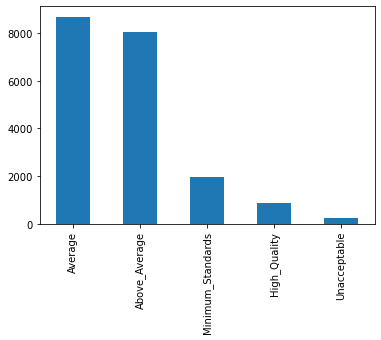

In [58]:
grades_bins = pd.cut(bin_df['grade'], grade_bins, labels=['Unacceptable', 'Minimum_Standards', 'Average', 
                                                          'Above_Average', 'High_Quality'])
grades_bins.value_counts().plot.bar()

In [59]:
bin_df['grade'] = grades_bins
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,Average,Average,0,1955,0,98178,47.5112,-122.257,1340,5650,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,Average,Average,400,1951,1991,98125,47.7210,-122.319,1690,7639,12
2,180000.0,2,1.00,770,10000,1.0,0,0,Average,Minimum_Standards,0,1933,0,98028,47.7379,-122.233,2720,8062,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,Excellent,Average,910,1965,0,98136,47.5208,-122.393,1360,5000,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,Average,Above_Average,0,1987,0,98074,47.6168,-122.045,1800,7503,2


**Zipcode: Method 1**

Zipcode and corresponding city has been taken from: https://www.zip-codes.com/county/wa-king.asp and organized into a csv file called 'zipcode_city.csv'

In [60]:
zip_df = pd.read_csv('data/zipcode_city.csv')
zip_df.head()

,Zip Code,City
0,98001,Auburn
1,98002,Auburn
2,98003,Federal_Way
3,98004,Bellevue
4,98005,Bellevue


In [61]:
# Make sure each zip code corresponds to a singular city ie. do not want one zip code to point to multiple cities
zip_df['Zip Code'].value_counts()

98047    1
98045    1
98108    1
98109    1
98111    1
        ..
98224    1
98001    1
98002    1
98003    1
98050    1
Name: Zip Code, Length: 120, dtype: int64

In [62]:
# test to make sure a join would suffice
test_df = bin_df
test_df = test_df.join(zip_df.set_index('Zip Code'), on='zipcode', how='left')
test_df['City'].isna().sum()

0

In [63]:
bin_df = bin_df.join(zip_df.set_index('Zip Code'), on='zipcode', how='left')
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,City
0,221900.0,3,1.00,1180,5650,1.0,0,0,Average,Average,0,1955,0,98178,47.5112,-122.257,1340,5650,10,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0,0,Average,Average,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,Seattle
2,180000.0,2,1.00,770,10000,1.0,0,0,Average,Minimum_Standards,0,1933,0,98028,47.7379,-122.233,2720,8062,2,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0,0,Excellent,Average,910,1965,0,98136,47.5208,-122.393,1360,5000,12,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0,0,Average,Above_Average,0,1987,0,98074,47.6168,-122.045,1800,7503,2,Sammamish


In [64]:
bin_df['City'].nunique()

24

In [65]:
bin_df.drop('zipcode', axis=1, inplace=True)

**Zipcode: Method 2**

Continuation off of zipcode method 1. This method will further bin the cities from method 1.

In [66]:
# find median latitude and longitude
print(df['lat'].median())
print(df['long'].median())

47.5716
-122.24700000000001


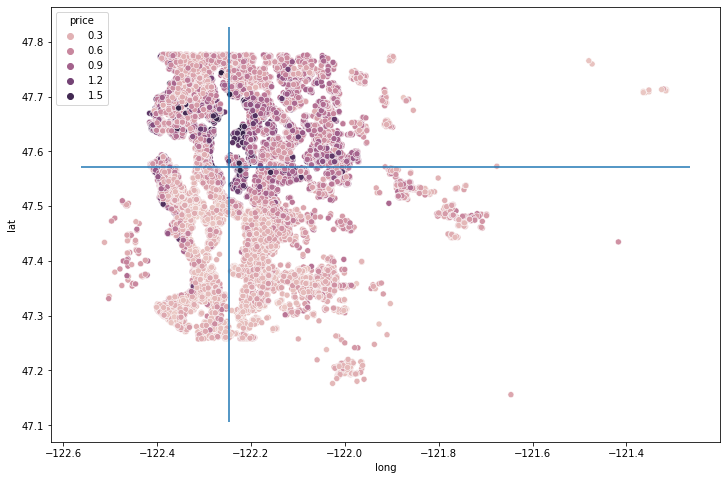

In [67]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', hue='price', data=df)
plt.vlines(-122.24700000000001, df['lat'].min()-.05, df['lat'].max()+.05)
plt.hlines(47.5716, df['long'].min()-.05, df['long'].max()+.05)

In [68]:
bin_df['City'].unique()

array(['Seattle', 'Kenmore', 'Sammamish', 'Federal_Way', 'Maple_Valley',
       'Duvall', 'Auburn', 'Kent', 'Redmond', 'Issaquah', 'Renton',
       'Bellevue', 'Kirkland', 'Black_Diamond', 'Mercer_Island',
       'North_Bend', 'Woodinville', 'Enumclaw', 'Bothell', 'Fall_City',
       'Vashon', 'Snoqualmie', 'Carnation', 'Medina'], dtype=object)

For this case, since there are only around 24 cities, manually assign each city to a quadrant depending on location.

**Results are as followed:**

**Quadrant 1 (Top-left)**: Seattle, Kenmore

**Quadrant 2 (Top-right)**: Medina, Bellevue, Kirkland, Redmond, Duvall, Carnation, Fall City, Sammamish, Bothel, Woodinville, Mercer Island

**Quadrant 3 (Bottom-left)**: Federal Way, Vashon, Kent

**Quadrant 4 (Bottom-right)**: Snoqualmie, Issaquah, Renton, North Bend, Black Diamond, Auburn, Maple Valley, Enumclaw

This data is provided in 'quadrant.csv'

In [69]:
quadrant_df = pd.read_csv('data/quadrant.csv')
quadrant_df.head()

,City,Quadrant
0,Auburn,4
1,Federal_Way,3
2,Bellevue,2
3,Black_Diamond,4
4,Bothell,2


In [70]:
bin_df = bin_df.join(quadrant_df.set_index('City'), on='City', how='left')
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,City,Quadrant
0,221900.0,3,1.00,1180,5650,1.0,0,0,Average,Average,0,1955,0,47.5112,-122.257,1340,5650,10,Seattle,1
1,538000.0,3,2.25,2570,7242,2.0,0,0,Average,Average,400,1951,1991,47.7210,-122.319,1690,7639,12,Seattle,1
2,180000.0,2,1.00,770,10000,1.0,0,0,Average,Minimum_Standards,0,1933,0,47.7379,-122.233,2720,8062,2,Kenmore,1
3,604000.0,4,3.00,1960,5000,1.0,0,0,Excellent,Average,910,1965,0,47.5208,-122.393,1360,5000,12,Seattle,1
4,510000.0,3,2.00,1680,8080,1.0,0,0,Average,Above_Average,0,1987,0,47.6168,-122.045,1800,7503,2,Sammamish,2


In [71]:
bin_df['Quadrant'].nunique()

4

In [72]:
bin_df.drop('City', axis=1, inplace=True)

**Month**

Separate into seasons
- Dec. to Feb.: Winter
- Mar. to May: Spring
- Jun. to Aug.: Summer
- Sep. to Nov.: Fall

The issue with seasonal bins is that winter is December through February so there needs to be a way for a bin to include 12, 1, 2. Here, substitute any December with a placeholder 0 to create the bins.

In [73]:
bin_df.loc[bin_df['month'] == 12, 'month'] = 0

In [74]:
# December is now represented as 0
bin_df['month'].value_counts()

5     2175
4     2054
7     2021
6     2006
8     1786
3     1728
10    1723
9     1645
0     1350
11    1301
2     1159
1      888
Name: month, dtype: int64

In [75]:
month_bins = [-1, 2, 5, 8, 11]
pd.cut(bin_df['month'], month_bins, labels=['Winter', 'Spring', 'Summer', 'Fall'])

0          Fall
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
21592    Spring
21593    Winter
21594    Summer
21595    Winter
21596      Fall
Name: month, Length: 19836, dtype: category
Categories (4, object): ['Winter' < 'Spring' < 'Summer' < 'Fall']

<AxesSubplot:>

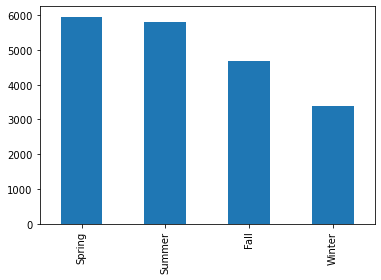

In [76]:
season_bins = pd.cut(bin_df['month'], month_bins, labels=['Winter', 'Spring', 'Summer', 'Fall'])
season_bins.value_counts().plot.bar()

In [77]:
bin_df['season'] = season_bins
bin_df.drop('month', axis=1, inplace=True)
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,Quadrant,season
0,221900.0,3,1.00,1180,5650,1.0,0,0,Average,Average,0,1955,0,47.5112,-122.257,1340,5650,1,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,Average,Average,400,1951,1991,47.7210,-122.319,1690,7639,1,Winter
2,180000.0,2,1.00,770,10000,1.0,0,0,Average,Minimum_Standards,0,1933,0,47.7379,-122.233,2720,8062,1,Winter
3,604000.0,4,3.00,1960,5000,1.0,0,0,Excellent,Average,910,1965,0,47.5208,-122.393,1360,5000,1,Winter
4,510000.0,3,2.00,1680,8080,1.0,0,0,Average,Above_Average,0,1987,0,47.6168,-122.045,1800,7503,2,Winter


**Dummy Variables**

Now create dummy variables for the binned variables

In [78]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(bin_df['waterfront'], prefix = 'waterfront', drop_first=True)
condition_dummy = pd.get_dummies(bin_df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(bin_df['grade'], prefix = 'grade', drop_first=True)
quadrant_dummy = pd.get_dummies(bin_df['Quadrant'], prefix = 'Quadrant', drop_first=True)
season_dummy = pd.get_dummies(bin_df['season'], prefix = 'season', drop_first=True)

In [79]:
bin_df = bin_df.drop(['waterfront', 'condition', 'grade', 'Quadrant', 'season'], axis=1)
bin_cat_df = pd.concat([waterfront_dummy, condition_dummy, grade_dummy, quadrant_dummy,
                season_dummy], axis=1)
bin_df = pd.concat([bin_df, waterfront_dummy, condition_dummy, grade_dummy, quadrant_dummy,
                season_dummy], axis=1)

In [80]:
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,condition_Average,condition_Good,condition_Excellent,grade_Minimum_Standards,grade_Average,grade_Above_Average,grade_High_Quality,Quadrant_2,Quadrant_3,Quadrant_4,season_Spring,season_Summer,season_Fall
0,221900.0,3,1.00,1180,5650,1.0,0,0,1955,0,47.5112,-122.257,1340,5650,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,0,400,1951,1991,47.7210,-122.319,1690,7639,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,47.6168,-122.045,1800,7503,0,1,0,0,0,0,1,0,1,0,0,0,0,0


## Continuous Variables

Determine continuous variables and log transform for normality


**Continuous variables**

- bedrooms
- bathrooms
- sqft_lot
- floors
- view
- sqft_living
- sqft_basement - dropped due to 0 values for log transform
- yr_built
- yr_renovated
- lat
- long
- sqft_living15
- sqft_lot15

In [81]:
# create list of continuous variables for log transforms
cont = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'sqft_living', 'sqft_living15', 'sqft_lot15']

cont_df = df[cont]

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

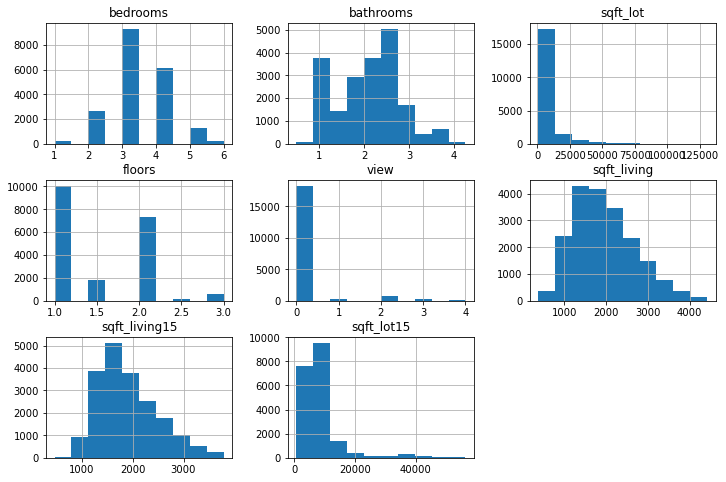

In [82]:
# A good amount look to be biased towards lower values
cont_df.hist(figsize=(12,8))

In [83]:
df.drop('sqft_basement', axis=1, inplace=True)

For the sake of this log transform, we can not have any 0 values, so substitute the 0's in 'view' for a low number

In [84]:
cont_df.loc[cont_df.view == 0, "view"] = .0001
cont_df.head()

/Users/hoganbyun/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,bedrooms,bathrooms,sqft_lot,floors,view,sqft_living,sqft_living15,sqft_lot15
0,3,1.00,5650,1.0,0.0001,1180,1340,5650
1,3,2.25,7242,2.0,0.0001,2570,1690,7639
2,2,1.00,10000,1.0,0.0001,770,2720,8062
3,4,3.00,5000,1.0,0.0001,1960,1360,5000
4,3,2.00,8080,1.0,0.0001,1680,1800,7503


In [85]:
# log transform for normality
log_cols = [f'{col}_log' for col in cont_df.columns]

cont_log_df = np.log(cont_df)
cont_log_df.columns = log_cols
cont_log_df

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,view_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,1.098612,0.000000,8.639411,0.000000,-9.21034,7.073270,7.200425,8.639411
1,1.098612,0.810930,8.887653,0.693147,-9.21034,7.851661,7.432484,8.941022
2,0.693147,0.000000,9.210340,0.000000,-9.21034,6.646391,7.908387,8.994917
3,1.386294,1.098612,8.517193,0.000000,-9.21034,7.580700,7.215240,8.517193
4,1.098612,0.693147,8.997147,0.000000,-9.21034,7.426549,7.495542,8.923058
...,...,...,...,...,...,...,...,...
21592,1.098612,0.916291,7.030857,1.098612,-9.21034,7.333023,7.333023,7.319202
21593,1.386294,0.916291,8.667852,0.693147,-9.21034,7.745003,7.512071,8.881836
21594,0.693147,-0.287682,7.207860,0.693147,-9.21034,6.927558,6.927558,7.604396
21595,1.098612,0.916291,7.778211,0.693147,-9.21034,7.377759,7.251345,7.160069


In [86]:
# create function to stardize values
def standardize(col):
    return (col - col.mean()) / col.std()

cont_log_norm_df = cont_log_df.apply(standardize)
cont_log_norm_df.head()

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,view_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,-0.231294,-1.707722,-0.309821,-0.935577,-0.290449,-1.104888,-1.006221,-0.321210
1,-0.231294,0.434726,0.025236,1.035471,-0.290449,0.902928,-0.241012,0.136071
2,-1.695802,-1.707722,0.460773,-0.935577,-0.290449,-2.205998,1.328267,0.217782
3,0.807791,1.194772,-0.474780,-0.935577,-0.290449,0.203998,-0.957368,-0.506507
4,-0.231294,0.123548,0.173022,-0.935577,-0.290449,-0.193624,-0.033079,0.108835


array([[<AxesSubplot:title={'center':'bedrooms_log'}>,
        <AxesSubplot:title={'center':'bathrooms_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'floors_log'}>,
        <AxesSubplot:title={'center':'view_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>],
       [<AxesSubplot:title={'center':'sqft_living15_log'}>,
        <AxesSubplot:title={'center':'sqft_lot15_log'}>, <AxesSubplot:>]],
      dtype=object)

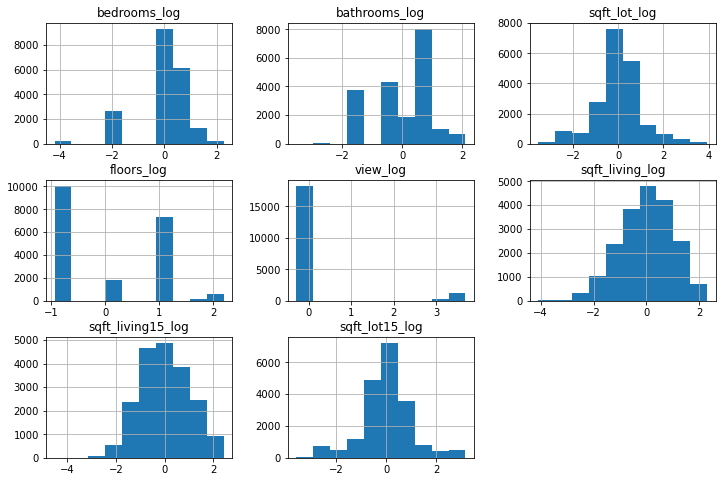

In [87]:
# values look much more normally distributed
cont_log_norm_df.hist(figsize=(12,8))

In [88]:
log_df = pd.concat([df, cont_log_norm_df], axis=1)
log_df.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'view', 'sqft_living', 'sqft_living15', 'sqft_lot15'], 
            axis=1, inplace=True)

In [89]:
log_df

,price,yr_built,yr_renovated,lat,long,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,...,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,view_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,221900.0,1955,0,47.5112,-122.257,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.231294,-1.707722,-0.309821,-0.935577,-0.290449,-1.104888,-1.006221,-0.321210
1,538000.0,1951,1991,47.7210,-122.319,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.231294,0.434726,0.025236,1.035471,-0.290449,0.902928,-0.241012,0.136071
2,180000.0,1933,0,47.7379,-122.233,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.695802,-1.707722,0.460773,-0.935577,-0.290449,-2.205998,1.328267,0.217782
3,604000.0,1965,0,47.5208,-122.393,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.807791,1.194772,-0.474780,-0.935577,-0.290449,0.203998,-0.957368,-0.506507
4,510000.0,1987,0,47.6168,-122.045,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.231294,0.123548,0.173022,-0.935577,-0.290449,-0.193624,-0.033079,0.108835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,2009,0,47.6993,-122.346,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.231294,0.713085,-2.480912,2.188460,-0.290449,-0.434869,-0.568982,-2.322812
21593,400000.0,2014,0,47.5107,-122.362,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.807791,0.713085,-0.271433,1.035471,-0.290449,0.627809,0.021426,0.046338
21594,402101.0,2009,0,47.5944,-122.299,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.695802,-2.467768,-2.242009,1.035471,-0.290449,-1.480743,-1.905993,-1.890422
21595,4000

# Model

## Regression Models

In [90]:
#X_init = pd.concat([cont_df, cat_df], axis=1)
y = df['price'] # outcome

### Initial Model

This model will be the initial model - without using log transforms on continuous variables

In [91]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

init_model = ols(formula=formula, data=df).fit()
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     946.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:01   Log-Likelihood:            -2.5610e+05
No. Observations:               19836   AIC:                         5.124e+05
Df Residuals:                   19729   BIC:                         5.133e+05
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.406e+07   4.21e+06     -3.337      0.001   -2.23e+07    -5.8e+06
bedrooms      -3042.4667   1102.489     -2.760      0.006   -5203.439    -881.495
bathrooms      1.624e+04   1763.477      9.210      0.000    1.28e+04    1.97e+04
sqft_living     110.1096      2.045     53.843      0.000     106.101     114.118
sqft_lot          1.0983      0.117      9.423      0.000       0.870       1.327
floors        -2703.6603   1821.210     -1.485      0.138   -6273.385     866.064
view           4.193e+04   1223.255     34.277      0.000    3.95e+04    4.43e+04
yr_built       -478.1031     42.064    -11.366      0.000    -560.552    -395.654
yr_renovated     20.9935      2.108      9.957      0.000      16.861      25.126
lat             4.33e+04   4.24e+04      1.022      0.307   -3.98e+04    1.26e+05
long          -1.059e+05   3.14e+04     -3.376      0.001   -1.67e+05   -4.44e+04
sqft_living15    26.1600      2.071     12.633      0.000      22.101      30.219
sqft_lot15       -0.6166      0.175     -3.532      0.000      -0.959      -0.274
waterfront_1   2.865e+05   1.32e+04     21.761      0.000    2.61e+05    3.12e+05
condition_2     5.39e+04   2.03e+04      2.652      0.008    1.41e+04    9.37e+04
condition_3    7.722e+04   1.88e+04      4.102      0.000    4.03e+04    1.14e+05
condition_4    9.776e+04   1.88e+04      5.191      0.000    6.08e+04    1.35e+05
condition_5    1.343e+05    1.9e+04      7.087      0.000    9.72e+04    1.71e+05
grade_4       -1.127e+05      1e+05     -1.123      0.261   -3.09e+05     8.4e+04
grade_5       -1.302e+05   9.88e+04     -1.318      0.188   -3.24e+05    6.34e+04
grade_6       -1.216e+05   9.86e+04     -1.233      0.217   -3.15e+05    7.16e+04
grade_7       -1.031e+05   9.86e+04     -1.046      0.295   -2.96e+05    9.01e+04
grade_8       -6.248e+04   9.86e+04     -0.634      0.526   -2.56e+05    1.31e+05
grade_9        2.988e+04   9.87e+04      0.303      0.762   -1.63e+05    2.23e+05
grade_10       1.168e+05   9.87e+04      1.183      0.237   -7.67e+04     3.1e+05
grade_11       2.188e+05   9.91e+04      2.207      0.027    2.45e+04    4.13e+05
grade_12       2.523e+05   1.21e+05      2.088      0.037    1.55e+04    4.89e+05
zipcode_98002  1.587e+04   8991.404      1.766      0.077   -1749.507    3.35e+04
zipcode_98003 -3869.4324   8046.158     -0.481      0.631   -1.96e+04    1.19e+04
zipcode_98004  5.962e+05   1.57e+04     37.859      0.000    5.65e+05    6.27e+05
zipcode_98005  3.267e+05   1.66e+04     19.711      0.000    2.94e+05    3.59e+05
zipcode_98006  2.559e+05   1.37e+04     18.730      0.000    2.29e+05    2.83e+05
zipcode_98007  2.507e+05   1.69e+04     14.791      0.000    2.17e+05    2.84e+05
zipcode_98008  2.459e+05   1.62e+04     15.155      0.000    2.14e+05    2.78e+05
zipcode_98010   1.03e+05   1.48e+04      6.942   

**Initial Observations:**

- Relatively good R-squared: .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [93]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Calculate Root MSE for train and test sets

In [94]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 98708.04596777058
Test Root Mean Squarred Error: 95120.53327689858


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- binning categorical data

**Model Validation: QQ Plot**

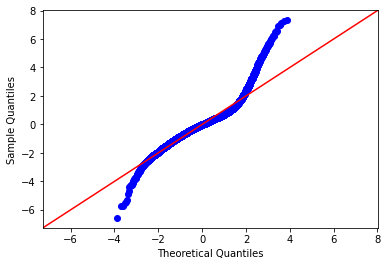

In [95]:
fig = sm.graphics.qqplot(init_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

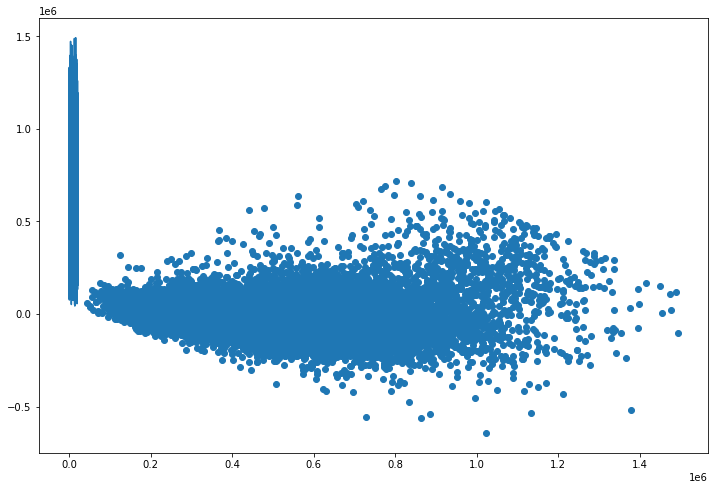

In [96]:
plt.figure(figsize=(12,8))
plt.scatter(init_model.predict(predictors), init_model.resid)
plt.plot(init_model.predict(predictors, [0 for i in range(len(predictors))]))

**Residual Histogram**

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   1.,
          3.,   2.,   0.,   1.,   1.,   2.,   2.,   4.,   2.,   0.,   3.,
          3.,   2.,   3.,   7.,   1.,   4.,   4.,   6.,   6.,   8.,  12.,
          9.,  17.,  13.,  25.,  13.,  24.,  31.,  32.,  41.,  55.,  61.,
         56.,  51.,  81.,  73.,  96., 122., 121., 122., 145., 180., 182.,
        204., 235., 281., 293., 297., 377., 328., 430., 441., 522., 538.,
        549., 603., 678., 714., 679., 747., 798., 808., 715., 738., 757.,
        664., 657., 603., 519., 488., 424., 354., 319., 259., 236., 185.,
        161., 133., 140., 102., 100., 100.,  85.,  63.,  60.,  64.,  44.,
         38.,  47.,  32.,  29.,  42.,  18.,  30.,  23.,  22.,  29.,  23.,
         22.,  19.,  18.,  19.,  17.,   8.,  11.,  14.,  19.,  14.,  11.,
         10.,  13.,  10.,   7.,   7., 

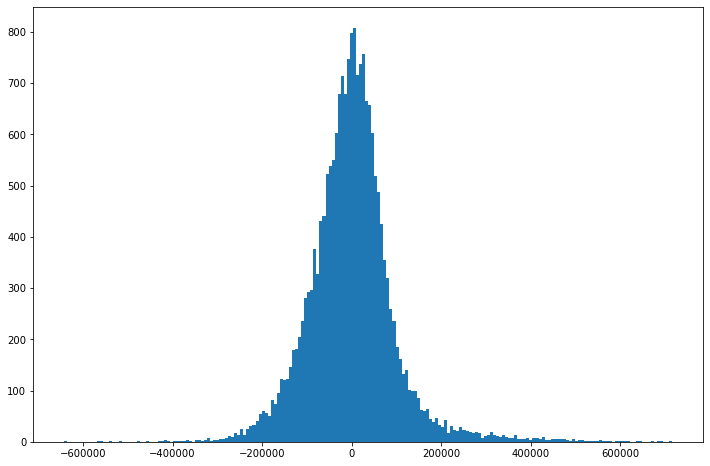

In [97]:
plt.figure(figsize=(12,8))
plt.hist(init_model.resid, bins = 200)

### Log Transform Model

In [98]:
X_log = pd.concat([cont_log_norm_df, cat_df], axis=1)

y = df['price']

In [99]:
outcome = 'price'
log_predictors = X_log
pred_sum = '+'.join(log_predictors.columns)

In [100]:
formula = outcome + '~' + pred_sum

In [101]:
formula

'price~bedrooms_log+bathrooms_log+sqft_lot_log+floors_log+view_log+sqft_living_log+sqft_living15_log+sqft_lot15_log+waterfront_1+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+zipcode_98119+zipcod

In [102]:
log_model = ols(formula=formula, data=log_df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     928.9
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:03   Log-Likelihood:            -2.5657e+05
No. Observations:               19836   AIC:                         5.133e+05
Df Residuals:                   19733   BIC:                         5.142e+05
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.563e+05   1.03e+05      3.459      0.001    1.54e+05    5.58e+05
bedrooms_log      -2461.1158    989.867     -2.486      0.013   -4401.338    -520.893
bathrooms_log      4660.0340   1207.040      3.861      0.000    2294.134    7025.934
sqft_lot_log        2.86e+04   1799.861     15.893      0.000    2.51e+04    3.21e+04
floors_log         4623.6283   1013.507      4.562      0.000    2637.069    6610.187
view_log           2.571e+04    793.559     32.398      0.000    2.42e+04    2.73e+04
sqft_living_log    7.375e+04   1568.654     47.017      0.000    7.07e+04    7.68e+04
sqft_living15_log    1.4e+04   1217.737     11.499      0.000    1.16e+04    1.64e+04
sqft_lot15_log    -5174.8793   1809.355     -2.860      0.004   -8721.367   -1628.391
waterfront_1       3.469e+05   1.31e+04     26.535      0.000    3.21e+05    3.73e+05
condition_2        5.868e+04   2.08e+04      2.820      0.005    1.79e+04    9.95e+04
condition_3        8.208e+04   1.93e+04      4.258      0.000    4.43e+04     1.2e+05
condition_4        1.021e+05   1.93e+04      5.294      0.000    6.43e+04     1.4e+05
condition_5        1.436e+05   1.94e+04      7.395      0.000    1.06e+05    1.82e+05
grade_4           -1.368e+05   1.03e+05     -1.332      0.183   -3.38e+05    6.46e+04
grade_5           -1.835e+05   1.01e+05     -1.814      0.070   -3.82e+05    1.48e+04
grade_6           -1.965e+05   1.01e+05     -1.946      0.052   -3.94e+05    1387.779
grade_7           -1.969e+05   1.01e+05     -1.951      0.051   -3.95e+05     955.452
grade_8            -1.56e+05   1.01e+05     -1.544      0.123   -3.54e+05     4.2e+04
grade_9           -5.055e+04   1.01e+05     -0.500      0.617   -2.49e+05    1.47e+05
grade_10            5.46e+04   1.01e+05      0.540      0.589   -1.44e+05    2.53e+05
grade_11           1.752e+05   1.02e+05      1.726      0.084   -2.37e+04    3.74e+05
grade_12           2.492e+05   1.24e+05      2.015      0.044    6820.670    4.92e+05
zipcode_98002      2.161e+04   9023.280      2.395      0.017    3928.209    3.93e+04
zipcode_98003      4824.9792   8143.119      0.593      0.554   -1.11e+04    2.08e+04
zipcode_98004      6.171e+05   8776.919     70.315      0.000       6e+05    6.34e+05
zipcode_98005      3.406e+05   1.01e+04     33.601      0.000    3.21e+05    3.61e+05
zipcode_98006      2.687e+05   7530.762     35.685      0.000    2.54e+05    2.83e+05
zipcode_98007      2.603e+05   1.03e+04     25.381      0.000     2.4e+05     2.8e+05
zipcode_98008      2.585e+05   8199.376     31.525      0.000    2.42e+05    2.75e+05
zipcode_98010      7.601e+04   1.27e+04      5.988      0.000    5.11e+04    1.01e+05
zipcode_98011      1.493e+05   9128.875     16.360      0.000    1.31e+05    1.67e+05
zipcode_98014      1.033e+05   1.26e+04      8.202      0.000    7.86e+04

**Initial Observations:**

- Relatively good R-squared: .830 -> decreased from .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(log_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [104]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 100259.45853891222
Test Root Mean Squarred Error: 100560.24005531262


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- non-linear/polynomial regression

**Model Validation: QQ Plot**

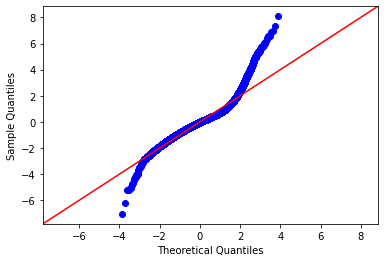

In [106]:
fig = sm.graphics.qqplot(log_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

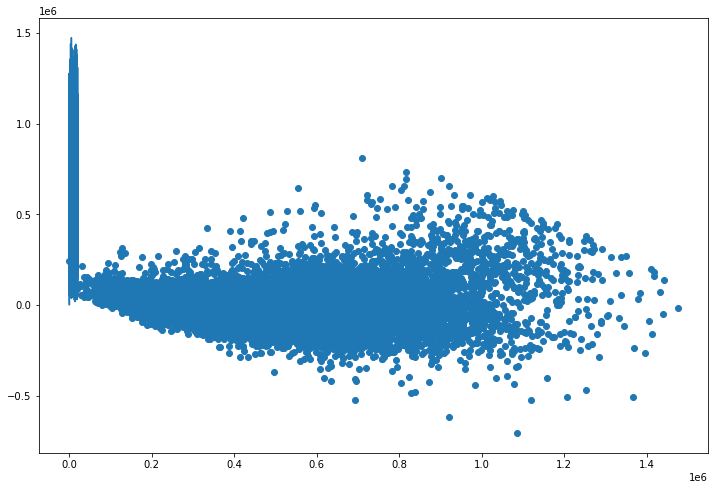

In [107]:
plt.figure(figsize=(12,8))
plt.scatter(log_model.predict(log_predictors), log_model.resid)
plt.plot(log_model.predict(log_predictors, [0 for i in range(len(log_predictors))]))

**Residual Histogram**

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   2.,   0.,   0.,   2.,   0.,   1.,   0.,
          0.,   1.,   1.,   1.,   2.,   1.,   2.,   3.,   1.,   0.,   0.,
          1.,   1.,   3.,   5.,   3.,   1.,   2.,   2.,   6.,   5.,   4.,
         15.,   8.,  11.,  18.,  18.,  17.,  18.,  35.,  32.,  46.,  50.,
         48.,  57.,  83.,  93.,  84., 115., 113., 144., 161., 195., 199.,
        247., 250., 301., 307., 389., 400., 480., 500., 535., 585., 636.,
        647., 728., 794., 816., 816., 853., 855., 839., 777., 751., 715.,
        621., 552., 468., 396., 335., 276., 248., 222., 185., 164., 152.,
        148., 111.,  80.,  90.,  67.,  54.,  61.,  60.,  56.,  41.,  39.,
         32.,  33.,  33.,  33.,  24.,  26.,  20.,  24.,  18.,  23.,  24.,
         17.,  16.,  10.,  11.,  12.,  11.,  13.,  13.,  11.,  14.,   8.,
         13.,   3.,   9.,   9.,  11., 

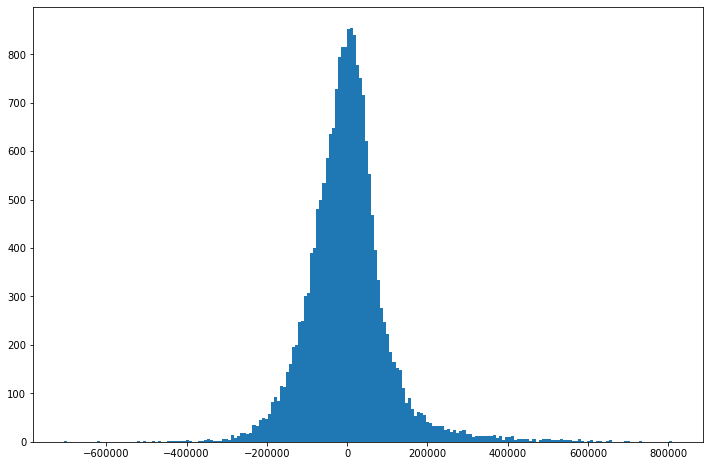

In [108]:
plt.figure(figsize=(12,8))
plt.hist(log_model.resid, bins = 200)

### Removing Zip Code and Long/Lat Data

In [109]:
# this list will be used to make predictors
drop_list = ['price']
# this list will be used for data in ols
drop_list2 = []
for col in df.columns:
    if ('lat' in col) | ('long' in col) | ('zip' in col):
        drop_list.append(col)
        drop_list2.append(col)
drop_list

['price',
 'lat',
 'long',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 

In [110]:
df.drop(columns = drop_list)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_1,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.00,1180,5650,1.0,0,1955,0,1340,5650,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,0,1951,1991,1690,7639,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1.00,770,10000,1.0,0,1933,0,2720,8062,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,1965,0,1360,5000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,0,1987,0,1800,7503,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,2009,0,1530,1509,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0,2014,0,1830,7200,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,0,2009,0,1020,2007,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0,2004,0,1410,1287,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
outcome = 'price'
no_zip_predictors = df.drop(columns = drop_list)
pred_sum = '+'.join(no_zip_predictors.columns)

In [112]:
formula = outcome + '~' + pred_sum
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+yr_built+yr_renovated+sqft_living15+sqft_lot15+waterfront_1+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12'

In [113]:
no_zip_df = df.drop(columns = drop_list2)

In [114]:
no_zip_model = ols(formula=formula, data=no_zip_df).fit()
no_zip_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     853.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:05   Log-Likelihood:            -2.6488e+05
No. Observations:               19836   AIC:                         5.298e+05
Df Residuals:                   19800   BIC:                         5.301e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.745e+06   1.85e+05     30.999      0.000    5.38e+06    6.11e+06
bedrooms      -1.743e+04   1681.288    -10.369      0.000   -2.07e+04   -1.41e+04
bathrooms      3.758e+04   2709.294     13.872      0.000    3.23e+04    4.29e+04
sqft_living      87.3591      3.135     27.870      0.000      81.215      93.503
sqft_lot          0.0778      0.180      0.433      0.665      -0.275       0.431
floors         3.302e+04   2644.516     12.487      0.000    2.78e+04    3.82e+04
view           3.443e+04   1827.618     18.841      0.000    3.09e+04     3.8e+04
yr_built      -2966.9667     53.117    -55.858      0.000   -3071.080   -2862.854
yr_renovated     11.3146      3.249      3.483      0.000       4.947      17.682
sqft_living15    45.6355      2.978     15.326      0.000      39.799      51.472
sqft_lot15       -2.4692      0.257     -9.596      0.000      -2.974      -1.965
waterfront_1   2.129e+05   2.01e+04     10.580      0.000    1.73e+05    2.52e+05
condition_2   -4259.9267   3.15e+04     -0.135      0.892    -6.6e+04    5.75e+04
condition_3    3.118e+04   2.92e+04      1.069      0.285    -2.6e+04    8.84e+04
condition_4    5.006e+04   2.92e+04      1.716      0.086   -7127.823    1.07e+05
condition_5    8.669e+04   2.94e+04      2.953      0.003    2.91e+04    1.44e+05
grade_4        2.602e+04   1.56e+05      0.167      0.867   -2.79e+05    3.31e+05
grade_5        1.974e+04   1.53e+05      0.129      0.897    -2.8e+05     3.2e+05
grade_6        7.832e+04   1.53e+05      0.513      0.608   -2.21e+05    3.78e+05
grade_7        1.679e+05   1.53e+05      1.099      0.272   -1.32e+05    4.67e+05
grade_8        2.665e+05   1.53e+05      1.744      0.081    -3.3e+04    5.66e+05
grade_9        4.065e+05   1.53e+05      2.659      0.008    1.07e+05    7.06e+05
grade_10       5.305e+05   1.53e+05      3.468      0.001    2.31e+05     8.3e+05
grade_11       6.472e+05   1.54e+05      4.214      0.000    3.46e+05    9.48e+05
grade_12       7.887e+05   1.87e+05      4.213      0.000    4.22e+05    1.16e+06
month_2        5926.6178   6812.706      0.870      0.384   -7426.856    1.93e+04
month_3        2.843e+04   6304.930      4.509      0.000    1.61e+04    4.08e+04
month_4        3.539e+04   6133.801      5.770      0.000    2.34e+04    4.74e+04
month_5        1.421e+04   6083.084      2.336      0.020    2285.894    2.61e+04
month_6        6929.9437   6160.601      1.125      0.261   -5145.351     1.9e+04
month_7        2479.6894   6153.361      0.403      0.687   -9581.413    1.45e+04
month_8        1903.7144   6275.416      0.303      0.762   -1.04e+04    1.42e+04
month_9       -2798.0257   6361.136     -0.440      0.660   -1.53e+04    9670.334
month_10       3563.8919   6311.313      0.565      0.572   -8806.811    1.59e+04
month_11      -2659.7702   6647.982     -0.400   

**Initial Observations:**

- R-squared dropped considerably -> decreased from .836 to .602
- waterfront, view, condition, grade all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(no_zip_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [116]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 153071.78441785843
Test Root Mean Squarred Error: 151285.4024057341


**Comments:**

Proportionally, there isn't a big difference (around $3000). However, the RMSE for both seem quite high.

This provided a worse RMSE than the initial model

**Model Validation: QQ Plot**

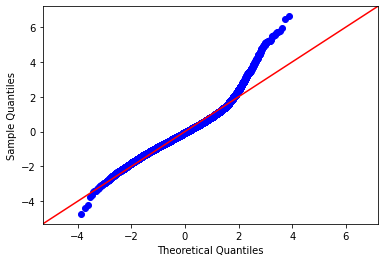

In [118]:
fig = sm.graphics.qqplot(no_zip_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

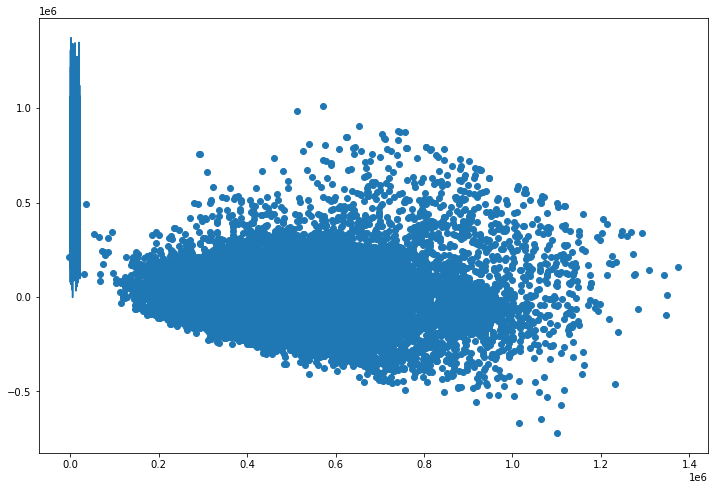

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(no_zip_model.predict(no_zip_predictors), no_zip_model.resid)
plt.plot(no_zip_model.predict(no_zip_predictors, [0 for i in range(len(no_zip_predictors))]))

**Residual Histogram**

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          2.,   2.,   1.,   1.,   2.,   2.,   3.,   3.,   3.,   7.,   3.,
          5.,   8.,   6.,   6.,   5.,  16.,  10.,   9.,  18.,  20.,  27.,
         26.,  39.,  29.,  35.,  38.,  50.,  51.,  51.,  74.,  82.,  94.,
         96.,  96., 109., 123., 169., 195., 180., 206., 220., 269., 266.,
        272., 323., 338., 351., 410., 424., 476., 480., 478., 459., 487.,
        481., 549., 532., 513., 522., 553., 481., 539., 527., 511., 506.,
        476., 455., 434., 445., 419., 348., 338., 304., 286., 293., 254.,
        244., 223., 204., 178., 181., 147., 129., 141., 116.,  96., 105.,
         70.,  68.,  57.,  51.,  60.,  48.,  47.,  42.,  46.,  40.,  41.,
         34.,  35.,  28.,  10.,  30.,  29.,  25.,  21.,  18.,  14.,  14.,
         19.,  23.,  13.,   9.,  13.,  11.,  11.,   9.,  12.,   9.,  19.,
         15.,  13.,   5.,   8.,   9., 

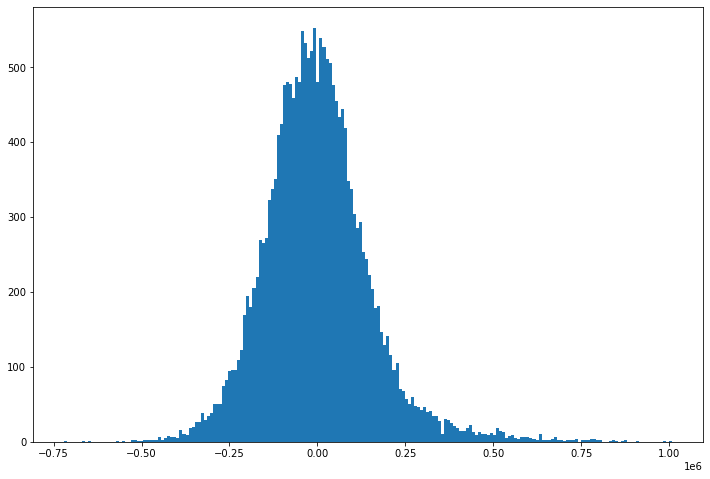

In [120]:
plt.figure(figsize=(12,8))
plt.hist(no_zip_model.resid, bins = 200)

### Binned Categorical Model

In [121]:
outcome = 'price'
bin_predictors = bin_df.drop('price', axis=1)
pred_sum = '+'.join(bin_predictors.columns)
formula = outcome + '~' + pred_sum

bin_model = ols(formula=formula, data=bin_df).fit()
bin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1612.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:06   Log-Likelihood:            -2.6248e+05
No. Observations:               19836   AIC:                         5.250e+05
Df Residuals:                   19808   BIC:                         5.252e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.763e+07    1.6e+06    -17.268      0.000   -3.08e+07   -2.45e+07
bedrooms                -1.531e+04   1489.621    -10.281      0.000   -1.82e+04   -1.24e+04
bathrooms                 3.02e+04   2439.858     12.379      0.000    2.54e+04     3.5e+04
sqft_living               112.8104      2.945     38.301      0.000     107.037     118.584
sqft_lot                    0.3809      0.160      2.388      0.017       0.068       0.694
floors                   3.431e+04   2702.408     12.697      0.000     2.9e+04    3.96e+04
view                     4.006e+04   1655.011     24.208      0.000    3.68e+04    4.33e+04
sqft_basement             -10.6629      3.449     -3.092      0.002     -17.423      -3.902
yr_built                -1871.9053     52.917    -35.374      0.000   -1975.628   -1768.183
yr_renovated               20.4382      2.884      7.086      0.000      14.785      26.092
lat                      3.505e+05   1.13e+04     31.022      0.000    3.28e+05    3.73e+05
long                    -1.195e+05   1.17e+04    -10.234      0.000   -1.42e+05   -9.66e+04
sqft_living15              53.9078      2.733     19.727      0.000      48.551      59.264
sqft_lot15                 -2.2586      0.230     -9.818      0.000      -2.709      -1.808
waterfront_1             2.283e+05   1.78e+04     12.809      0.000    1.93e+05    2.63e+05
condition_Average        2.574e+04   1.03e+04      2.500      0.012    5557.693    4.59e+04
condition_Good           5.654e+04   1.03e+04      5.466      0.000    3.63e+04    7.68e+04
condition_Excellent      9.286e+04   1.08e+04      8.629      0.000    7.18e+04    1.14e+05
grade_Minimum_Standards  1.945e+04   9082.434      2.141      0.032    1644.893    3.72e+04
grade_Average            7.061e+04   8887.614      7.944      0.000    5.32e+04     8.8e+04
grade_Above_Average      1.587e+05   9314.525     17.038      0.000     1.4e+05    1.77e+05
grade_High_Quality       3.299e+05    1.1e+04     29.971      0.000    3.08e+05    3.51e+05
Quadrant_2               6.345e+04   3733.143     16.996      0.000    5.61e+04    7.08e+04
Quadrant_3              -8.581e+04   4870.961    -17.617      0.000   -9.54e+04   -7.63e+04
Quadrant_4              -2.512e+04   4580.778     -5.484      0.000   -3.41e+04   -1.61e+04
season_Spring            2.284e+04   2908.301      7.855      0.000    1.71e+04    2.85e+04
season_Summer           -1480.4353   2926.097     -0.506      0.613   -7215.831    4254.961
season_Fall             -3689.1061   3051.479     -1.209      0.227   -9670.260    2292.048
==============================================================================
Omnibus:                     5226.162   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            2237

**Model Validation: Train-Test Split**

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bin_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))


15868 3968 15868 3968


In [123]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [124]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 134381.2966663412
Test Root Mean Squarred Error: 137914.40170672032


**Model Validation: QQ Plot**

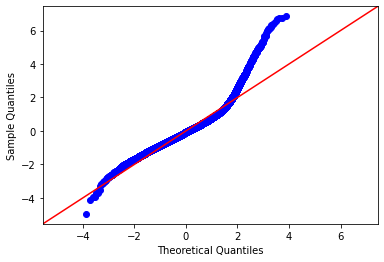

In [125]:
fig = sm.graphics.qqplot(bin_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

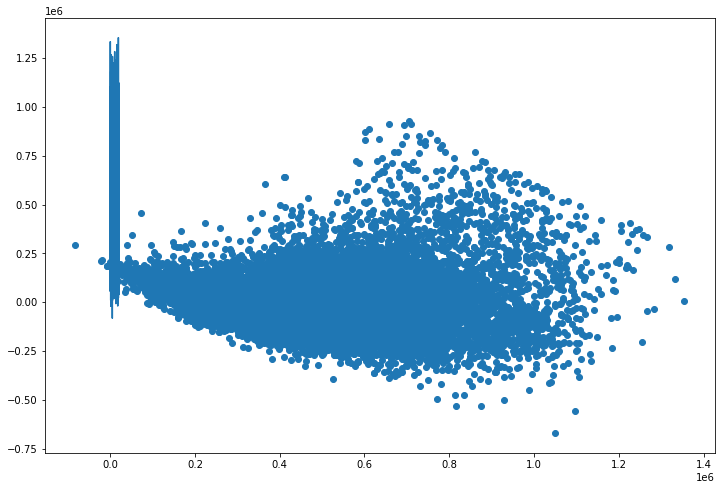

In [126]:
plt.figure(figsize=(12,8))
plt.scatter(bin_model.predict(bin_predictors), bin_model.resid)
plt.plot(bin_model.predict(bin_predictors, [0 for i in range(len(bin_predictors))]))

**Residual Histogram**

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,
          0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   1.,   2.,   1.,
          3.,   2.,   2.,   3.,   4.,   6.,   9.,   5.,   7.,  11.,  12.,
         14.,  11.,   9.,  19.,  18.,  24.,  44.,  46.,  36.,  58.,  61.,
         90.,  88.,  96., 114., 134., 133., 153., 179., 191., 239., 278.,
        285., 294., 376., 382., 396., 441., 423., 463., 516., 552., 542.,
        546., 595., 547., 514., 556., 543., 614., 546., 599., 527., 563.,
        513., 496., 484., 466., 462., 378., 329., 332., 288., 259., 262.,
        228., 204., 183., 177., 142., 128., 118., 105.,  80.,  75.,  75.,
         61.,  55.,  65.,  61.,  52.,  49.,  30.,  31.,  47.,  41.,  31.,
         21.,  27.,  25.,  26.,  18.,  18.,  27.,  18.,  17.,  22.,  22.,
         12.,  19.,  14.,  14.,  15.,  17.,  15.,  12.,  16.,  12.,  14.,
          5.,   6.,  10.,   7.,   8., 

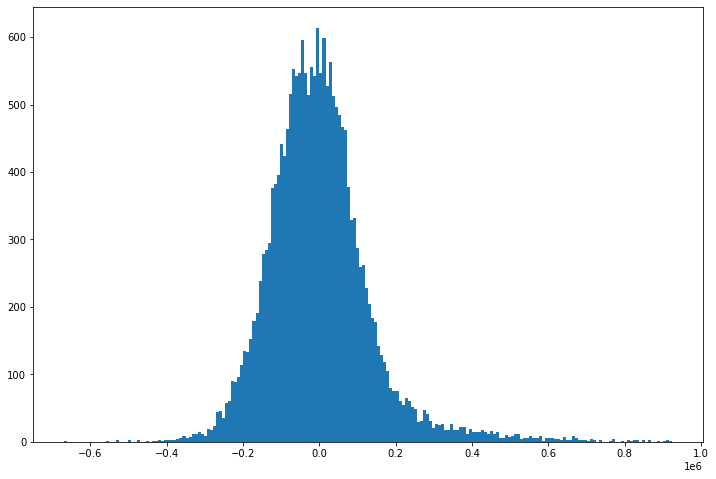

In [127]:
# slight right skew, 
plt.figure(figsize=(12,8))
plt.hist(bin_model.resid, bins = 200)

### Final Model

The final model used will be the binned categorical model (after removing nonsignificant variables ie. p > .05. The R-squared value did drop by around .015, however, we were able to cut down on the number of dummy categorical variables considerably. 

We see an R-squared of .687

Significant variables are bedrooms, bathrooms, floors, quadrant, waterfront, view, condition, grade

In [128]:
final_df = bin_df
outcome = 'price'
final_predictors = final_df.drop(['price','season_Summer', 'season_Fall', 'floors', 'sqft_basement'], axis=1)
pred_sum = '+'.join(final_predictors.columns)
formula = outcome + '~' + pred_sum

final_model = ols(formula=formula, data=final_df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1856.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:07   Log-Likelihood:            -2.6261e+05
No. Observations:               19836   AIC:                         5.253e+05
Df Residuals:                   19812   BIC:                         5.255e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.681e+07    1.6e+06    -16.711      0.000      -3e+07   -2.37e+07
bedrooms                -1.616e+04   1498.481    -10.781      0.000   -1.91e+04   -1.32e+04
bathrooms                3.617e+04   2367.533     15.278      0.000    3.15e+04    4.08e+04
sqft_living               110.7802      2.734     40.519      0.000     105.421     116.139
sqft_lot                    0.3433      0.161      2.138      0.033       0.029       0.658
view                     3.802e+04   1652.217     23.009      0.000    3.48e+04    4.13e+04
yr_built                -1655.1884     51.569    -32.097      0.000   -1756.267   -1554.109
yr_renovated               22.5201      2.901      7.764      0.000      16.835      28.205
lat                      3.582e+05   1.13e+04     31.568      0.000    3.36e+05     3.8e+05
long                    -1.067e+05   1.17e+04     -9.118      0.000    -1.3e+05   -8.37e+04
sqft_living15              54.5545      2.718     20.073      0.000      49.227      59.882
sqft_lot15                 -2.5424      0.231    -11.023      0.000      -2.994      -2.090
waterfront_1              2.39e+05   1.79e+04     13.328      0.000    2.04e+05    2.74e+05
condition_Average        2.684e+04   1.04e+04      2.590      0.010    6528.863    4.72e+04
condition_Good            5.36e+04   1.04e+04      5.151      0.000    3.32e+04     7.4e+04
condition_Excellent      8.947e+04   1.08e+04      8.268      0.000    6.83e+04    1.11e+05
grade_Minimum_Standards  1.699e+04   9138.477      1.859      0.063    -923.873    3.49e+04
grade_Average            6.672e+04   8942.810      7.461      0.000    4.92e+04    8.43e+04
grade_Above_Average      1.638e+05   9370.390     17.480      0.000    1.45e+05    1.82e+05
grade_High_Quality       3.426e+05    1.1e+04     31.051      0.000    3.21e+05    3.64e+05
Quadrant_2               5.454e+04   3685.293     14.799      0.000    4.73e+04    6.18e+04
Quadrant_3              -9.022e+04   4874.240    -18.509      0.000   -9.98e+04   -8.07e+04
Quadrant_4               -2.81e+04   4587.309     -6.125      0.000   -3.71e+04   -1.91e+04
season_Spring            2.432e+04   2109.667     11.530      0.000    2.02e+04    2.85e+04
==============================================================================
Omnibus:                     5138.242   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21523.068
Skew:                           1.223   Prob(JB):                         0.00
Kurtosis:                       7.479   Cond. No.                     2.97e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number 

**Model Validation: Test-Train Split**

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))


15868 3968 15868 3968


In [130]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [131]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 136261.44200453543
Test Root Mean Squarred Error: 134963.49067087323


**Model Validation: QQ Plot**

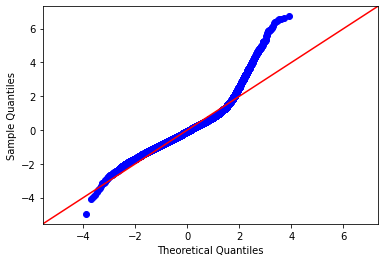

In [132]:
fig = sm.graphics.qqplot(final_model.resid, dist=stats.norm, line='45', fit=True)
#plt.savefig('model_QQ.png')

**Model Validation: Heteroscedasticity**

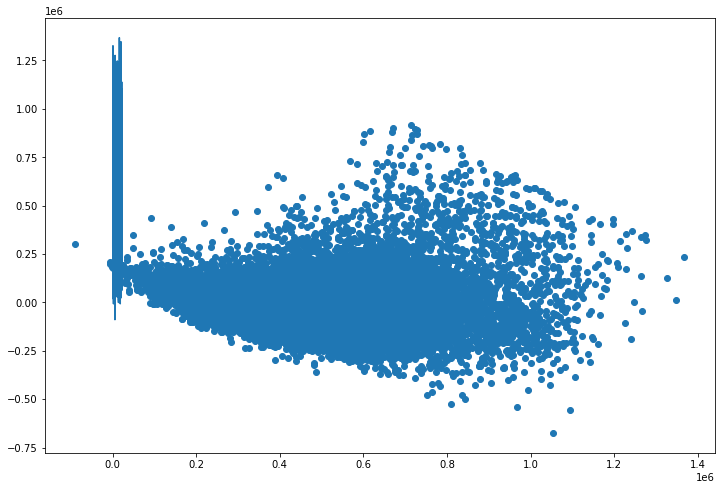

In [133]:
plt.figure(figsize=(12,8))
plt.scatter(final_model.predict(final_predictors), final_model.resid)
plt.plot(final_model.predict(final_predictors, [0 for i in range(len(final_predictors))]))
#plt.savefig('model_heteroscedasticity.png')

**Model Validation: Residual Histogram**

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   1.,   0.,   0.,   1.,   3.,   2.,
          1.,   2.,   2.,   2.,   3.,   3.,  11.,   5.,   7.,   9.,  14.,
          7.,  14.,   8.,  19.,  23.,  19.,  35.,  31.,  36.,  64.,  67.,
         66.,  81.,  90.,  96.,  94., 137., 156., 176., 191., 190., 232.,
        276., 290., 322., 353., 361., 390., 448., 478., 528., 511., 519.,
        501., 552., 560., 530., 554., 520., 564., 527., 544., 556., 552.,
        544., 532., 495., 484., 474., 434., 375., 345., 354., 304., 284.,
        259., 225., 182., 185., 165., 139., 133., 115.,  94., 102.,  75.,
         62.,  61.,  65.,  67.,  64.,  41.,  40.,  37.,  42.,  37.,  25.,
         37.,  30.,  27.,  28.,  23.,  20.,  27.,  24.,  18.,  16.,  21.,
         12.,  19.,  18.,  17.,  19.,  10.,  12.,  16.,  17.,  15.,   8.,
          7.,  17.,   6.,   8.,  15., 

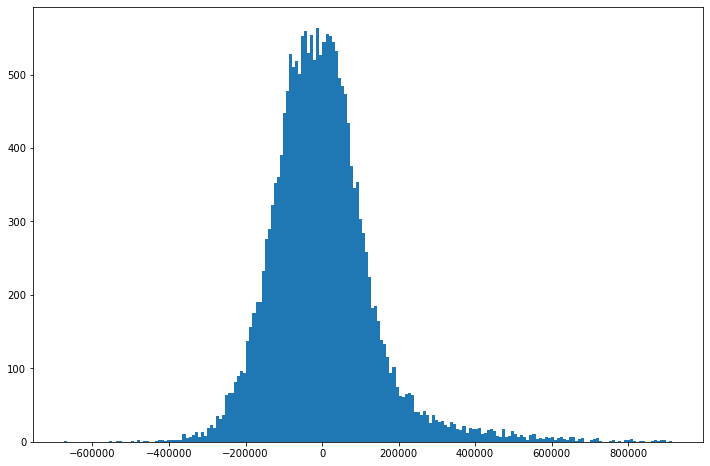

In [134]:
# slight right skew, 
plt.figure(figsize=(12,8))
plt.hist(final_model.resid, bins = 200)
#plt.savefig('model_resid.png')

# Interpret

## When Are Renovations Worth It?

### Predicting Prices Between Renovated and Non-Renovated Homes

In [135]:
renov_df = final_df.loc[df['yr_renovated'] > 0]

In [136]:
outcome = 'price'
renov_predictors = renov_df.drop('price', axis=1)
pred_sum = '+'.join(renov_predictors.columns)
formula = outcome + '~' + pred_sum

renov_model = ols(formula=formula, data=renov_df).fit()
renov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     55.19
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.67e-144
Time:                        19:18:08   Log-Likelihood:                -8586.2
No. Observations:                 639   AIC:                         1.723e+04
Df Residuals:                     611   BIC:                         1.735e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5.675e+07   1.18e+07     -4.829      0.000   -7.98e+07   -3.37e+07
bedrooms                -2.214e+04   9375.009     -2.361      0.019   -4.05e+04   -3724.209
bathrooms                3.161e+04   1.46e+04      2.169      0.030    2989.986    6.02e+04
sqft_living               107.7861     18.516      5.821      0.000      71.424     144.148
sqft_lot                    0.0334      0.871      0.038      0.969      -1.676       1.743
floors                  -1.016e+04   1.98e+04     -0.513      0.608    -4.9e+04    2.87e+04
view                     3.072e+04   8291.584      3.705      0.000    1.44e+04     4.7e+04
sqft_basement              38.1690     22.824      1.672      0.095      -6.654      82.992
yr_built                -1312.7469    376.073     -3.491      0.001   -2051.299    -574.195
yr_renovated             1668.3618    526.724      3.167      0.002     633.953    2702.771
lat                      4.007e+05   8.12e+04      4.937      0.000    2.41e+05     5.6e+05
long                    -3.016e+05   8.75e+04     -3.445      0.001   -4.74e+05    -1.3e+05
sqft_living15              86.2612     17.061      5.056      0.000      52.756     119.766
sqft_lot15                 -3.7860      1.431     -2.645      0.008      -6.597      -0.975
waterfront_1             2.278e+05   5.43e+04      4.198      0.000    1.21e+05    3.34e+05
condition_Average        1.492e+05   8.94e+04      1.669      0.096   -2.64e+04    3.25e+05
condition_Good           1.792e+05   9.04e+04      1.982      0.048    1651.656    3.57e+05
condition_Excellent      1.763e+05   9.62e+04      1.833      0.067   -1.26e+04    3.65e+05
grade_Minimum_Standards -7284.4709   7.97e+04     -0.091      0.927   -1.64e+05    1.49e+05
grade_Average             3.94e+04   7.84e+04      0.503      0.615   -1.15e+05    1.93e+05
grade_Above_Average      1.996e+05   8.03e+04      2.485      0.013    4.19e+04    3.57e+05
grade_High_Quality       4.388e+05   9.06e+04      4.843      0.000    2.61e+05    6.17e+05
Quadrant_2               1.352e+05   2.69e+04      5.033      0.000    8.24e+04    1.88e+05
Quadrant_3              -3.029e+04   4.53e+04     -0.668      0.504   -1.19e+05    5.87e+04
Quadrant_4               4.328e+04   3.88e+04      1.117      0.265   -3.28e+04    1.19e+05
season_Spring            1.042e+04   2.19e+04      0.475      0.635   -3.27e+04    5.35e+04
season_Summer           -2.154e+04   2.25e+04     -0.957      0.339   -6.57e+04    2.27e+04
season_Fall             -2.063e+04   2.28e+04     -0.904      0.366   -6.54e+04    2.42e+04
==============================================================================
Omnibus:                       35.762   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               5

In [137]:
not_renov_df = final_df.loc[df['yr_renovated'] == 0]

In [138]:
not_renov_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,condition_Average,condition_Good,condition_Excellent,grade_Minimum_Standards,grade_Average,grade_Above_Average,grade_High_Quality,Quadrant_2,Quadrant_3,Quadrant_4,season_Spring,season_Summer,season_Fall
0,221900.0,3,1.00,1180,5650,1.0,0,0,1955,0,47.5112,-122.257,1340,5650,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,0,1933,0,47.7379,-122.233,2720,8062,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,1987,0,47.6168,-122.045,1800,7503,0,1,0,0,0,0,1,0,1,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,0,0,1995,0,47.3097,-122.327,2238,6819,0,1,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2009,0,47.6993,-122.346,1530,1509,0,1,0,0,0,0,1,0,0,0,0,1,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2014,0,47.5107,-122.362,1830,7200,0,1,0,0,0,0,1,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2009,0,47.5944,-122.299,1020,2007,0,1,0,0,0,1,0,0,0,0,0,0,1,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2004,0,47.5345,-122.069,1410,1287,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [139]:
outcome = 'price'
non_renov_predictors = not_renov_df.drop('price', axis=1)
pred_sum = '+'.join(non_renov_predictors.columns)
formula = outcome + '~' + pred_sum

not_renov_model = ols(formula=formula, data=not_renov_df).fit()
not_renov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1611.
Date:                Sun, 24 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:08   Log-Likelihood:            -2.5375e+05
No. Observations:               19197   AIC:                         5.076e+05
Df Residuals:                   19170   BIC:                         5.078e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -2.676e+07   1.61e+06    -16.658      0.000   -2.99e+07   -2.36e+07
bedrooms                -1.531e+04   1501.040    -10.199      0.000   -1.83e+04   -1.24e+04
bathrooms                2.933e+04   2471.496     11.868      0.000    2.45e+04    3.42e+04
sqft_living               114.5765      2.977     38.484      0.000     108.741     120.412
sqft_lot                    0.4024      0.162      2.485      0.013       0.085       0.720
floors                   3.652e+04   2716.479     13.445      0.000    3.12e+04    4.18e+04
view                     4.017e+04   1691.760     23.745      0.000    3.69e+04    4.35e+04
sqft_basement             -14.3014      3.479     -4.111      0.000     -21.121      -7.482
yr_built                -1886.0550     53.679    -35.136      0.000   -1991.271   -1780.839
yr_renovated             1.118e-06   1.19e-07      9.424      0.000    8.85e-07    1.35e-06
lat                      3.495e+05   1.13e+04     30.836      0.000    3.27e+05    3.72e+05
long                     -1.13e+05   1.17e+04     -9.653      0.000   -1.36e+05   -9.01e+04
sqft_living15              52.6446      2.766     19.031      0.000      47.222      58.067
sqft_lot15                 -2.2113      0.232     -9.513      0.000      -2.667      -1.756
waterfront_1             2.369e+05   1.98e+04     11.948      0.000    1.98e+05    2.76e+05
condition_Average        2.297e+04   1.03e+04      2.235      0.025    2829.036    4.31e+04
condition_Good           5.484e+04   1.03e+04      5.315      0.000    3.46e+04    7.51e+04
condition_Excellent      9.152e+04   1.07e+04      8.529      0.000    7.05e+04    1.13e+05
grade_Minimum_Standards  2.222e+04   9055.839      2.453      0.014    4467.019       4e+04
grade_Average            7.337e+04   8861.580      8.279      0.000     5.6e+04    9.07e+04
grade_Above_Average       1.58e+05   9296.669     16.998      0.000     1.4e+05    1.76e+05
grade_High_Quality       3.274e+05    1.1e+04     29.757      0.000    3.06e+05    3.49e+05
Quadrant_2               6.118e+04   3741.066     16.354      0.000    5.38e+04    6.85e+04
Quadrant_3              -8.678e+04   4866.828    -17.831      0.000   -9.63e+04   -7.72e+04
Quadrant_4              -2.673e+04   4577.531     -5.839      0.000   -3.57e+04   -1.78e+04
season_Spring            2.294e+04   2909.760      7.885      0.000    1.72e+04    2.86e+04
season_Summer           -1137.3433   2926.255     -0.389      0.698   -6873.059    4598.373
season_Fall             -3596.7770   3055.620     -1.177      0.239   -9586.060    2392.506
==============================================================================
Omnibus:                     5328.518   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            2411

In [140]:
# predicted what non-renovated homes would have been had they been renovated
price_pred = renov_model.predict(non_renov_predictors)

price_diff = price_pred - not_renov_df['price']
price_diff.mean()

price_diff.sum() / not_renov_df['price'].sum()

-6.7445351293321885

In [141]:
# predicted what non-renovated homes would have been had they been renovated
renov_pred = not_renov_model.predict(renov_predictors)
renov_pred

1        614145.241818
35       678159.053877
95       676792.934301
103      783842.959631
125      868016.065877
             ...      
19602    360582.546634
20041    469719.338300
20428    514935.197734
20431    398251.237860
20946     66198.798353
Length: 639, dtype: float64

In [142]:
renov_price_diff = renov_pred - renov_df['price']
renov_price_diff.mean()

-40127.73951494763

In [143]:
renov_price_diff.sum() / renov_df['price'].sum()

-0.06402373681385401

### Areas of Focus for a Flipper

We know that the variables that have a significant effect on the model are bedrooms, bathrooms, floors, location, waterfront, view, condition, grade. Of these, the ones that can most likely be improved strictly from renovations (or are scaleable and changeable) are the following:
- bathrooms
- condition
- grade
- view

For each of the three home features, determine the ideal times to buy a house.

**Bathrooms**

We want to see how the number of bathrooms may influence price. First, let's see what range of values bathrooms has.

In [144]:
df['bathrooms'].value_counts()

2.50    5049
1.00    3772
1.75    2930
2.25    1930
2.00    1849
1.50    1414
2.75    1062
3.00     642
3.50     536
3.25     405
3.75      89
0.75      67
4.00      55
4.25      23
1.25       9
0.50       4
Name: bathrooms, dtype: int64

We notice that there are 1/4, 1/2, and 3/4 values for bathrooms as well. These can be defined as:
- 1/4 bathroom: contains either a sink, shower, toilet, or bathtub
- 1/2 bathroom: contains only a toilet and sink (no shower or bath)
- 3/4 bathroom: contains one sink, one toilet, and either a shower or bath
- Full bathroom: contains one of each: sink, toilet, shower, and bath

In [145]:
bathroom_df = df[['price','bathrooms']]
bathroom_df.head()

,price,bathrooms
0,221900.0,1.00
1,538000.0,2.25
2,180000.0,1.00
3,604000.0,3.00
4,510000.0,2.00


In [146]:
price_bathroom_df = bathroom_df.groupby(['bathrooms']).mean()
price_bathroom_df

,price
bathrooms,
0.50,2.373750e+05
0.75,2.906344e+05
1.00,3.474337e+05
1.25,6.217722e+05
1.50,4.095546e+05
1.75,4.504582e+05
2.00,4.520359e+05
2.25,5.113399e+05
2.50,5.335115e+05


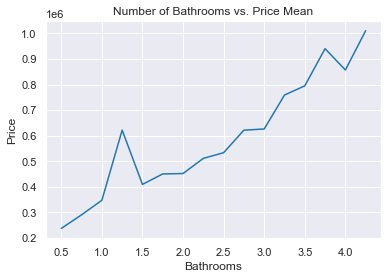

In [147]:
# plot bathroom vs. price
sns.set_style('darkgrid')
sns.set_context('notebook')
fig = plt.figure(figsize=(6,4))
plt.title('Number of Bathrooms vs. Price Mean')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.plot(price_bathroom_df.index, price_bathroom_df['price'])
#plt.savefig('bath_actual.png')

The smallest increment to improving a bathroom is by 0.25. Here, we can identify ideal opportunties to upgrade a bathroom to increase profit.

We see some noticeable jumps after a 0.25 bathroom upgrade for the following and would recommend upgrading bathrooms if the opportunity is there:
- 1 to 1.25
- 3 to 3.25
- 3.5 to 3.75
- 4 to 4.25

Now let's look at condition.

**Condition**

*From Data*

First, we need to know what each incrememnt of the grading scale indicates. However, there is no indication of what 1-5 on the condition scale means. Thus, we should look for the ideal condition to buy a house in, if planning to increase the condition grade by 1. In addition, when referring to correlations between variables, condition and grade had a -0.146896 correlation, indicating basically no relationship.

In [148]:
condtion_df = pd.read_csv('data/kc_house_data.csv')
condtion_df.groupby('condition')['price'].mean()

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [149]:
condtion_df.groupby('condition')['price'].median()

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64

In [150]:
price_mean_by_condition_df = condtion_df.groupby('condition')['price'].mean()
price_median_by_condition_df = condtion_df.groupby('condition')['price'].median()

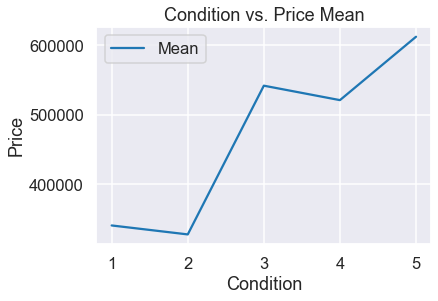

In [151]:
sns.set_style('darkgrid')
sns.set_context('talk')
fig = plt.figure(figsize=(6,4))
plt.title('Condition vs. Price Mean')
plt.xlabel('Condition')
plt.xticks(range(6))
plt.ylabel('Price')
plt.plot(price_mean_by_condition_df, label='Mean')
plt.legend()
#plt.savefig('condition_act.png')

Here, the most obvious choice would be turning a condition 2 home into a condition 3 home, as we see that the plots are steepest between these two points.

*From Model*

In [152]:
condition_df = pd.DataFrame(final_model.params, columns=['price'])
condition_df = condition_df.loc[['condition_Average', 'condition_Good', 'condition_Excellent']]
condition_df.reset_index(inplace=True)


<BarContainer object of 3 artists>

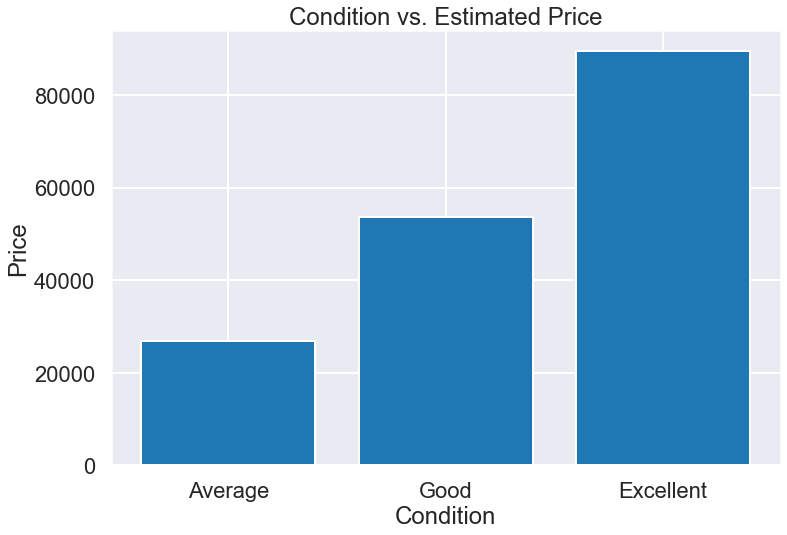

In [153]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.title('Condition vs. Estimated Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(range(3),['Average', 'Good', 'Excellent'])
plt.bar(condition_df['index'], condition_df['price'])
#plt.savefig('condition_pred.png')



**Grade**

Grade is determined by the King County scale:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [154]:
grade_df = pd.read_csv('data/kc_house_data.csv')

In [155]:
grade_df.groupby('grade')['price'].mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

In [156]:
grade_df.groupby('grade')['price'].median()

grade
3      262000.0
4      200000.0
5      228700.0
6      275276.5
7      375000.0
8      510000.0
9      720000.0
10     914327.0
11    1280000.0
12    1820000.0
13    2980000.0
Name: price, dtype: float64

In [157]:
price_mean_by_grade_df = grade_df.groupby('grade')['price'].mean()

In [158]:
price_median_by_grade_df = grade_df.groupby('grade')['price'].median()

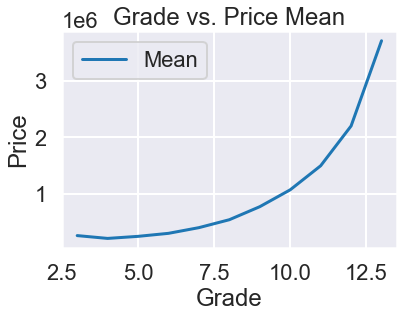

In [159]:
fig = plt.figure(figsize=(6,4))
plt.title('Grade vs. Price Mean')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.plot(price_mean_by_grade_df, label='Mean')
plt.legend()
#plt.savefig('grade_act.png')

Both the mean and median of prices seem to increase exponentially depending on the grade. The average house-flipper would probably like to focus less on large, luxurious homes, and more on houses that are relatively more affordable and liquid. Looking at the grading system, a 10 grade takes into account floor plans and a larger square footage, which are more difficult to address when aiming to flip or renovate. Thus, house flippers should aim to reach as close to a 9 grade while minimizing costs. The recommendation for the lowest grade of house to buy would be a 5, as fixing a building to reach minimum building codes (5 to 6) would probably cost less than $50k, which is roughly the difference in sale prices for both the median and mean. 

*From Model*

In [160]:
grade_df = pd.DataFrame(final_model.params, columns=['price'])
grade_df = grade_df.loc[['grade_Minimum_Standards', 'grade_Average', 'grade_Above_Average', 'grade_High_Quality']]
grade_df.reset_index(inplace=True)

<BarContainer object of 4 artists>

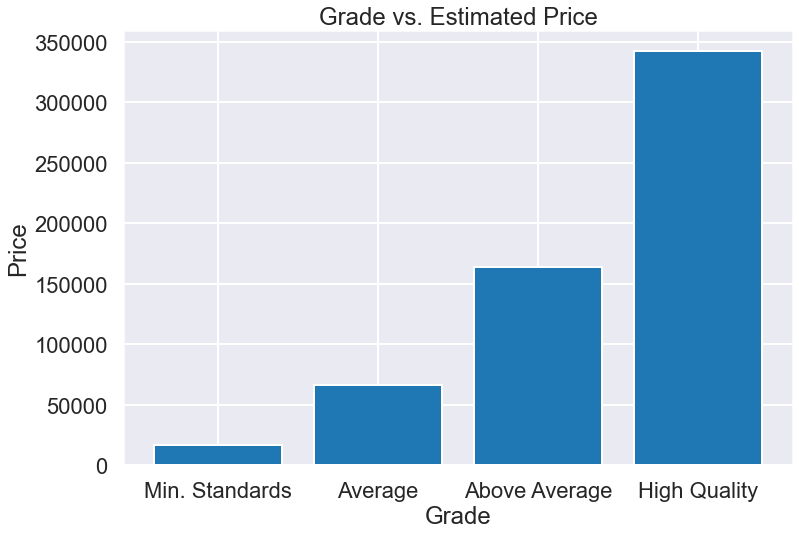

In [161]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.figure(figsize=(12,8))
plt.title('Grade vs. Estimated Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(range(4),['Min. Standards', 'Average', 'Above Average', 'High Quality'])
plt.bar(grade_df['index'], grade_df['price'])
#plt.savefig('grade_pred.png')

**Views**

This one is not really pertaining to renovations, hoewever, it can be controlled easily ie. more open houses = more views

In [162]:
view_df = pd.read_csv('data/kc_house_data.csv')

In [163]:
view_df.groupby('view')['price'].mean()

view
0.0    4.968061e+05
1.0    8.133733e+05
2.0    7.913904e+05
3.0    9.732852e+05
4.0    1.452466e+06
Name: price, dtype: float64

In [164]:
view_mean_by_grade_df = view_df.groupby('view')['price'].mean()

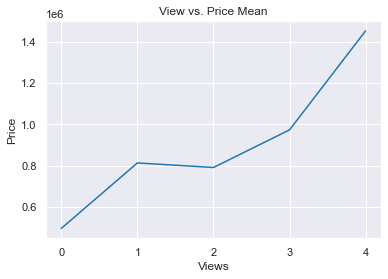

In [165]:
fig = plt.figure(figsize=(6,4))
sns.set_context('notebook')
plt.title('View vs. Price Mean')
plt.xlabel('Views')
plt.xticks(range(5))
plt.ylabel('Price')
plt.plot(view_mean_by_grade_df)
#plt.savefig('view_act.png')

## Final Recommendations

Bathrooms, Condition, Grade, and View all have a positive correlation to price. For bathrooms, ideally, one would want to renovate bathrooms as much as possible. The benefit of adding bathrooms is that there are 1/4 incrememnts, meaning that you do not need to clear/make new rooms to "add" bathrooms. Simply adding a shower or bath will suffice, which is much easier than clearing space for a new room. Grade and Condition both should be improved before flipping a house as increases in each correlate to a higher sale price. Lastly, the number of views significantly correlates to higher sale prices. The recommendation here is to hold as many open houses as one can, ensuring increased exposure and more buyers.